In [1]:
import requests
import json
from shapely.geometry import shape
import geopandas as gpd
import pandas as pd

In [2]:
url = "https://api.openrouteservice.org/v2/directions/cycling-regular/geojson"

body = {"coordinates":[[10.781088,59.908227],[10.7544337247013,59.91218291295141]],"attributes":["percentage"],"extra_info":["surface","waycategory","waytype"],"preference":"recommended","roundabout_exits":"true","geometry":"true"}
headers = {
    'Accept': 'application/json, application/geo+json, application/gpx+xml, img/png; charset=utf-8',
    'Authorization': '5b3ce3597851110001cf62481780b7770b914a96a64e38112581d6ee',
    'Content-Type': 'application/json; charset=utf-8'
}

In [3]:
bike_data = pd.read_csv("../data/july_2022_filtered_renamed.csv")
bike_data = bike_data.drop(columns=["Unnamed: 0"])


'''
bike_data = bike_data.rename(columns={
    "start_station_id": "st_st_id",
    "start_station_name": "st_st_name",
    "start_station_description": "st_st_desc",
    "start_station_latitude": "st_st_lat",
    "start_station_longitude": "st_st_lon",
    "end_station_id": "en_st_id",
    "end_station_name": "en_st_name",
    "end_station_description": "en_st_desc",
    "end_station_latitude": "en_st_lat",
    "end_station_longitude": "en_st_lon"
})
bike_data.to_csv("../data/july_2022_filtered_renamed.csv")
'''

'\nbike_data = bike_data.rename(columns={\n    "start_station_id": "st_st_id",\n    "start_station_name": "st_st_name",\n    "start_station_description": "st_st_desc",\n    "start_station_latitude": "st_st_lat",\n    "start_station_longitude": "st_st_lon",\n    "end_station_id": "en_st_id",\n    "end_station_name": "en_st_name",\n    "end_station_description": "en_st_desc",\n    "end_station_latitude": "en_st_lat",\n    "end_station_longitude": "en_st_lon"\n})\nbike_data.to_csv("../data/july_2022_filtered_renamed.csv")\n'

In [4]:
bike_data

,started_at,ended_at,duration,st_st_id,st_st_name,st_st_desc,st_st_lat,st_st_lon,en_st_id,en_st_name,en_st_desc,en_st_lat,en_st_lon,minutes,id
0,2022-07-01 03:00:14.428000+00:00,2022-07-01 03:16:28.492000+00:00,974,447,Kværnerbyen,langs Smeltedigelen,59.904473,10.786167,1755,Aker Brygge,ved trikkestopp,59.911184,10.730035,16,0
1,2022-07-01 03:00:25.577000+00:00,2022-07-01 03:16:23.183000+00:00,957,537,St. Olavs gate,ved Pilestredet,59.917968,10.738629,431,Chr. Michelsens Gate,ved Fjellgata,59.927292,10.773185,15,1
2,2022-07-01 03:04:57.874000+00:00,2022-07-01 03:14:42.301000+00:00,584,563,Huitfeldts gate,ved Observatoriegata,59.912684,10.722900,2328,The Hub,Mellom Oslo City og The Hub hotel,59.912522,10.750910,9,6
3,2022-07-01 03:05:27.456000+00:00,2022-07-01 03:11:22.103000+00:00,354,442,Vulkan,ved Maridalsveien,59.922510,10.751010,599,Paléhaven,langs Strandgata,59.910331,10.750110,5,7
4,2022-07-01 03:11:37.601000+00:00,2022-07-01 03:47:45.110000+00:00,2167,464,Sukkerbiten,ved gangbroen,59.905124,10.753764,600,Dyvekes bru,ved skatepark,59.905323,10.768958,36,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131699,2022-07-31 22:16:34.424000+00:00,2022-07-31 22:27:44.146000+00:00,669,507,Jens Bjelkes Gate,ved Trondheimsveien,59.919147,10.764130,424,Birkelunden,langs Seilduksgata,59.925611,10.760926,11,159253
131700,2022-07-31 22:34:28.118000+00:00,2022-07-31 22:41:16.862000+00:00,408,564,Oscars gate,ved Hegdehaugsveien,59.922422,10.727239,468,Skillebekk,langs Drammensveien,59.912793,10.710103,6,159255
131701,2022-07-31 22:44:17.928000+00:00,2022-07-31 22:53:18.083000+00:00,540,575,Sognsveien,ved Ullevål Stadion T-bane,59.947433,10.732570,434,Lindern,krysset ved Kirkeveien og Stensgata,59.935888,10.735006,9,159257
131702,2022-07-31 22:46:26.630000+00:00,2022-07-31 22:53:37.354000+00:00,430,581,Jordalgata,ved Galgeberg busstopp,59.908227,10.781088,460,Botanisk Hage sør,langs Jens Bjelkes gate,59.915418,10.769330,7,159258


In [5]:
row = bike_data.iloc[0]
row

started_at    2022-07-01 03:00:14.428000+00:00
ended_at      2022-07-01 03:16:28.492000+00:00
duration                                   974
st_st_id                                   447
st_st_name                         Kværnerbyen
st_st_desc                 langs Smeltedigelen
st_st_lat                            59.904473
st_st_lon                            10.786167
en_st_id                                  1755
en_st_name                         Aker Brygge
en_st_desc                     ved trikkestopp
en_st_lat                            59.911184
en_st_lon                            10.730035
minutes                                     16
id                                           0
Name: 0, dtype: object

In [6]:
type(row)

pandas.core.series.Series

In [7]:
start_lat = row["st_st_lat"]
start_lon = row["st_st_lon"]
end_lat = row["en_st_lat"]
end_lon = row["en_st_lon"]

body["coordinates"] = [[start_lon,start_lat],[end_lon,end_lat]]

In [8]:
r=requests.post(url, json=body, headers=headers)

In [10]:
print(r.text)
print(r.status_code)

{"type":"FeatureCollection","features":[{"bbox":[10.729717,59.902749,10.786409,59.911724],"type":"Feature","properties":{"segments":[{"distance":3793.5,"duration":815.9,"steps":[{"distance":5.6,"duration":3.4,"type":11,"instruction":"Head north","name":"-","way_points":[0,2]},{"distance":5.1,"duration":3.0,"type":1,"instruction":"Turn right","name":"-","way_points":[2,3]},{"distance":5.3,"duration":1.1,"type":0,"instruction":"Turn left onto Smeltedigelen","name":"Smeltedigelen","way_points":[3,4]},{"distance":56.5,"duration":11.3,"type":6,"instruction":"Continue straight onto Turbinveien","name":"Turbinveien","way_points":[4,9]},{"distance":157.2,"duration":31.4,"type":0,"instruction":"Turn left onto Freserveien","name":"Freserveien","way_points":[9,15]},{"distance":126.8,"duration":25.4,"type":13,"instruction":"Keep right","name":"-","way_points":[15,23]},{"distance":44.1,"duration":8.8,"type":1,"instruction":"Turn right","name":"-","way_points":[23,27]},{"distance":327.3,"duration":6

In [126]:
response = json.loads(r.text)

In [127]:
properties = response["features"][0]["properties"]
geometry = response["features"][0]["geometry"]

In [128]:
geom = shape(geometry)

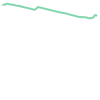

In [129]:
geom

In [130]:
type(geom)

shapely.geometry.linestring.LineString

In [131]:
geom.wkt

'LINESTRING (10.786247 59.904461, 10.786262 59.904486, 10.786287 59.904506, 10.786374 59.904492, 10.786397 59.904539, 10.786409 59.904571, 10.786398 59.904598, 10.78635 59.904613, 10.785634 59.904713, 10.785546 59.90473, 10.785523 59.904685, 10.785476 59.904592, 10.785381 59.904422, 10.785062 59.903898, 10.784774 59.903456, 10.784723 59.903378, 10.784608 59.903342, 10.784044 59.903112, 10.783925 59.903092, 10.783662 59.903079, 10.783485 59.90304, 10.783147 59.902825, 10.783001 59.902776, 10.782913 59.902749, 10.782788 59.902768, 10.782341 59.902843, 10.782228 59.902836, 10.782159 59.902823, 10.781938 59.902867, 10.781376 59.902994, 10.780699 59.903214, 10.780446 59.903275, 10.780199 59.903316, 10.779905 59.903354, 10.779261 59.90342, 10.77853 59.903465, 10.778144 59.903479, 10.777996 59.903483, 10.777437 59.903502, 10.776824 59.903562, 10.776596 59.903512, 10.776338 59.903541, 10.775604 59.903663, 10.774834 59.903853, 10.774546 59.903931, 10.773335 59.904266, 10.771739 59.904706, 10.77

In [132]:
x,y = geom.coords.xy
pd.DataFrame({'LAT':x,'LON':y})

,LAT,LON
0,10.786247,59.904461
1,10.786262,59.904486
2,10.786287,59.904506
3,10.786374,59.904492
4,10.786397,59.904539
...,...,...
232,10.730347,59.911257
233,10.730332,59.911265
234,10.729772,59.911025
235,10.729717,59.911053


In [133]:
distance = properties["summary"]["distance"]
distance

3793.5

In [134]:
segments = properties["segments"]
waytypes = properties["extras"]["waytypes"]

In [135]:
waytypes

{'values': [[0, 3, 7],
  [3, 15, 3],
  [15, 40, 6],
  [40, 82, 2],
  [82, 96, 6],
  [96, 104, 2],
  [104, 177, 1],
  [177, 192, 2],
  [192, 208, 7],
  [208, 214, 2],
  [214, 219, 6],
  [219, 236, 7]],
 'summary': [{'value': 2.0, 'distance': 1233.0, 'amount': 32.5},
  {'value': 1.0, 'distance': 1093.0, 'amount': 28.81},
  {'value': 6.0, 'distance': 752.3, 'amount': 19.83},
  {'value': 7.0, 'distance': 496.2, 'amount': 13.08},
  {'value': 3.0, 'distance': 219.1, 'amount': 5.78}]}

In [138]:
row["total_dist"] = distance

waytypes_data = ""
waytypes_summary = ""

for data_row in waytypes["values"]:
    waytypes_data += " ".join(str(x) for x in data_row) + ";"

for summary_row in waytypes["summary"]:
    waytypes_summary += " ".join(str(k)[0]+":"+str(v) for k, v in summary_row.items()) + ";"
    # value - which waytype, distance - in m, amount - in %

row["waytypes_d"] = waytypes_data # waytypes data
row["waytypes_s"] = waytypes_summary # waytypes summary
row

/var/folders/bv/mvwnb3fd1rdbr345qwm8mqb40000gn/T/ipykernel_31465/2383804800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["total_dist"] = distance
/var/folders/bv/mvwnb3fd1rdbr345qwm8mqb40000gn/T/ipykernel_31465/2383804800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row["total_dist"] = distance
/var/folders/bv/mvwnb3fd1rdbr345qwm8mqb40000gn/T/ipykernel_31465/2383804800.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

started_at                     2022-07-01 03:00:14.428000+00:00
ended_at                       2022-07-01 03:16:28.492000+00:00
duration                                                    974
st_st_id                                                    447
st_st_name                                          Kværnerbyen
st_st_desc                                  langs Smeltedigelen
st_st_lat                                             59.904473
st_st_lon                                             10.786167
en_st_id                                                   1755
en_st_name                                          Aker Brygge
en_st_desc                                      ved trikkestopp
en_st_lat                                             59.911184
en_st_lon                                             10.730035
minutes                                                      16
id                                                            0
total_dist                              

In [139]:
row["waytypes_d"]

'0 3 7;3 15 3;15 40 6;40 82 2;82 96 6;96 104 2;104 177 1;177 192 2;192 208 7;208 214 2;214 219 6;219 236 7;'

In [140]:
row["waytypes_s"]

'v:2.0 d:1233.0 a:32.5;v:1.0 d:1093.0 a:28.81;v:6.0 d:752.3 a:19.83;v:7.0 d:496.2 a:13.08;v:3.0 d:219.1 a:5.78;'

In [141]:
row.to_dict()

{'started_at': '2022-07-01 03:00:14.428000+00:00',
 'ended_at': '2022-07-01 03:16:28.492000+00:00',
 'duration': 974,
 'st_st_id': 447,
 'st_st_name': 'Kværnerbyen',
 'st_st_desc': 'langs Smeltedigelen',
 'st_st_lat': 59.904473,
 'st_st_lon': 10.786167,
 'en_st_id': 1755,
 'en_st_name': 'Aker Brygge',
 'en_st_desc': 'ved trikkestopp',
 'en_st_lat': 59.91118372188379,
 'en_st_lon': 10.730034556850455,
 'minutes': 16,
 'id': 0,
 'total_dist': 3793.5,
 'waytypes_d': '0 3 7;3 15 3;15 40 6;40 82 2;82 96 6;96 104 2;104 177 1;177 192 2;192 208 7;208 214 2;214 219 6;219 236 7;',
 'waytypes_s': 'v:2.0 d:1233.0 a:32.5;v:1.0 d:1093.0 a:28.81;v:6.0 d:752.3 a:19.83;v:7.0 d:496.2 a:13.08;v:3.0 d:219.1 a:5.78;'}

In [142]:
gdf = gpd.GeoDataFrame([row.to_dict()], geometry=[geom], crs="EPSG:4326")

In [143]:
gdf

,started_at,ended_at,duration,st_st_id,st_st_name,st_st_desc,st_st_lat,st_st_lon,en_st_id,en_st_name,en_st_desc,en_st_lat,en_st_lon,minutes,id,total_dist,waytypes_d,waytypes_s,geometry
0,2022-07-01 03:00:14.428000+00:00,2022-07-01 03:16:28.492000+00:00,974,447,Kværnerbyen,langs Smeltedigelen,59.904473,10.786167,1755,Aker Brygge,ved trikkestopp,59.911184,10.730035,16,0,3793.5,0 3 7;3 15 3;15 40 6;40 82 2;82 96 6;96 104 2;...,v:2.0 d:1233.0 a:32.5;v:1.0 d:1093.0 a:28.81;v...,"LINESTRING (10.78625 59.90446, 10.78626 59.904..."


In [144]:
gdf.to_file("test.shp")

In [147]:
gdf = gpd.read_file("test.shp")

In [151]:
import folium

m = folium.Map([59.90446,10.78625], zoom_start=14)
folium.Choropleth(
    gdf,
    line_weight=3,
    line_color="blue"
).add_to(m)

m